# Sarter Notebook

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [194]:
# read train data
df_orders = pd.read_csv("orders.csv", sep=";")
df_products = pd.read_csv("product_attributes.csv", sep=",")
df_dists = pd.read_csv("cities_data.csv", sep=";")
ordersXproducts = pd.read_csv("ordersXproducts.csv", sep=",")

# read test data
# df_test = pd.read_csv("test.csv", sep=";")

In [235]:
# Canviar els noms per tal que sigui consistent en ORIGIN PORT
df_orders["origin_port"] = df_orders["origin_port"].replace(["ATHENAS"], "Athens")
df_orders["origin_port"] = df_orders["origin_port"].replace(["BCN"], "Barcelona")

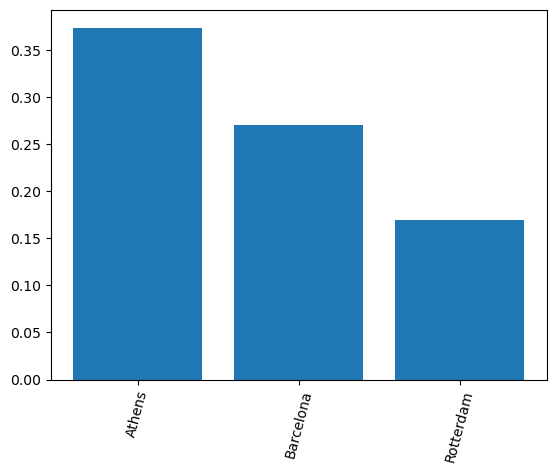

In [190]:
counts = df_orders["late_order"].groupby(df_orders["origin_port"]).value_counts()

ports = df_orders.origin_port.unique()
ports.sort()
lateness_ratio = [[],[]]
for i in range(len(ports)):
    lateness_ratio[0].append(ports[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

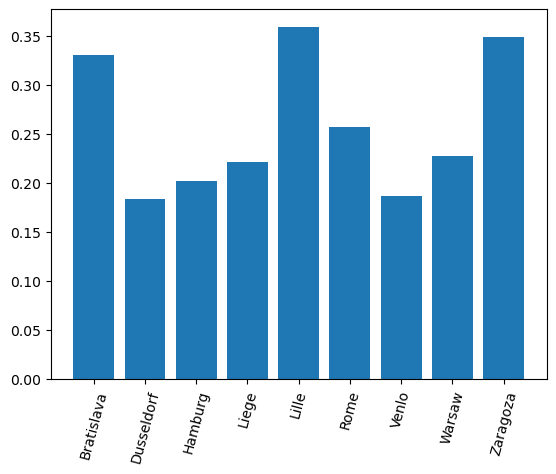

In [191]:
counts = df_orders["late_order"].groupby(df_orders["logistic_hub"]).value_counts()

hubs_a = df_orders.logistic_hub.unique()
hubs = []
for i in hubs_a:
    if type(i) is not float:
        hubs.append(i)

hubs.sort()

lateness_ratio = [[],[]]
for i in range(len(hubs)):
    lateness_ratio[0].append(hubs[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))
    
plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

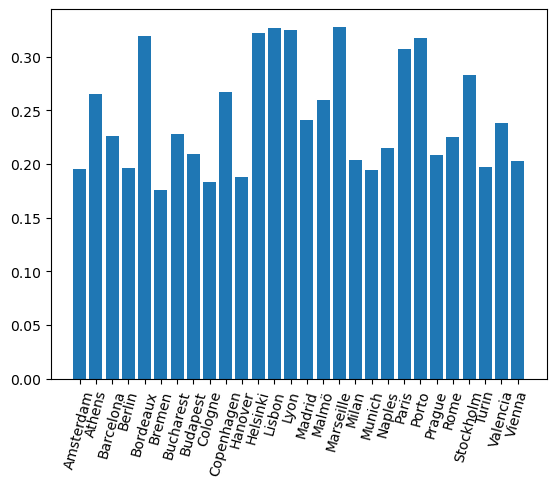

In [189]:
counts = df_orders["late_order"].groupby(df_orders["customer"]).value_counts()

destins = df_orders.customer.unique()
destins.sort()

lateness_ratio = [[],[]]
for i in range(len(destins)):
    lateness_ratio[0].append(destins[i])
    lateness_ratio[1].append(counts[2*i + 1]/(counts[2*i] + counts[2*i + 1]))

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

In [224]:
counts = ordersXproducts["late_order"].groupby(ordersXproducts["material_handling"]).value_counts()

mat = ordersXproducts.material_handling.unique()
mat.sort()

mate = mat[0:6]

[0. 1. 2. 3. 4. 5.]


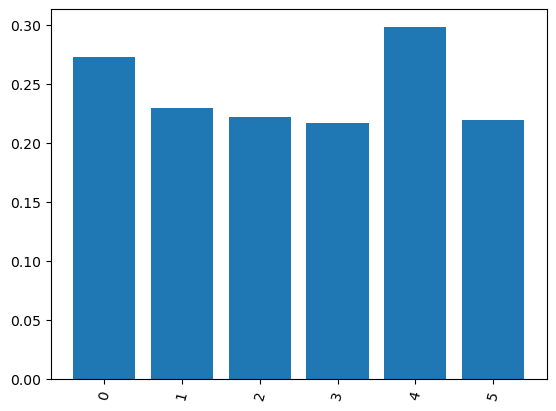

In [225]:

lateness_ratio = [[],[]]
for i in range(len(mate)):
    lateness_ratio[0].append(mate[i])
    lateness_ratio[1].append(counts[i][1]/(counts[i][0] + counts[i][1]))

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

In [231]:
counts = df_orders["late_order"].groupby([df_orders["origin_port"], df_orders["customer"]]).value_counts()
counts

origin_port  customer   late_order
ATHENAS      Amsterdam  False           60
                        True            28
             Athens     True            27
                        False           25
             Barcelona  False           48
                                      ... 
Rotterdam    Turin      True           173
             Valencia   False          799
                        True           152
             Vienna     False         3415
                        True           571
Name: late_order, Length: 280, dtype: int64

['Rotterdam' 'Athens' 'Barcelona']


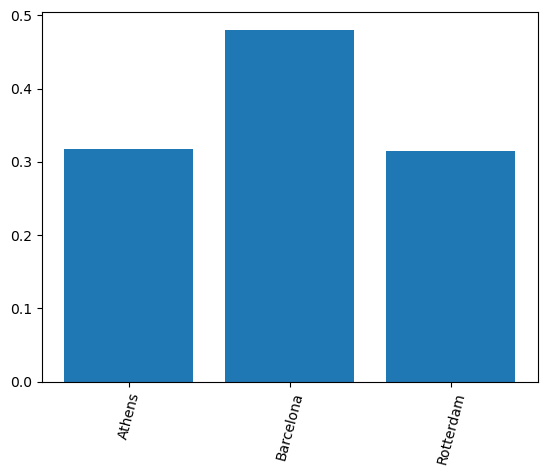

In [236]:
ports = df_orders.origin_port.unique()
customers = df_orders.customer.unique()
ports.sort()
customers.sort()
lateness_ratio = [[],[]]
k = 0
for i in range(len(ports)):
    for j in range(len(customers)):
        lateness_ratio[0].append(ports[i] + customers[j])
        lateness_ratio[1].append(counts[2*k + 1]/(counts[2*k] + counts[2*k + 1]))
        k += 1

plt.bar(lateness_ratio[0], lateness_ratio[1])
plt.xticks(rotation = 75)
plt.show()

## Dummy Model

In [ ]:
from sklearn.dummy import DummyClassifier

X_train = df_orders.drop(['late_order'], axis=1)
y_train = df_orders['late_order']

X_test = df_test

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

pred_proba = dummy_clf.predict_proba(X_test)

## Save Solution
> **Note:** Submited probabilities must be for the **True** cases.

In [ ]:
submission = pd.DataFrame({"order_id": X_test.order_id, "late_order": pred_proba[:,1]})
submission.to_csv("submission_kaggle.csv", index=False)